<a href="https://colab.research.google.com/github/afka2d/dbt/blob/master/Copy_of_Carta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('calendar.csv')
summary = df.describe()
print(summary)

         listing_id          price
count  9.829500e+05  982950.000000
mean   2.709136e+07     202.158518
std    1.378660e+07     325.455831
min    1.265100e+04       0.000000
25%    1.629927e+07      79.000000
50%    2.874998e+07     129.000000
75%    3.946912e+07     229.000000
max    4.729992e+07   10000.000000


In [ ]:
df2 = pd.read_csv('listings.csv')
summary = df2.describe()
print(summary)

                 id       host_id  accommodates     bedrooms         beds  \
count  2.693000e+03  2.693000e+03   2693.000000  2529.000000  2659.000000   
mean   2.709138e+07  9.181177e+07      3.869662     1.708976     2.219631   
std    1.378917e+07  9.921901e+07      3.156237     1.156607     2.031332   
min    1.265100e+04  2.490000e+02      0.000000     1.000000     0.000000   
25%    1.629927e+07  1.363514e+07      2.000000     1.000000     1.000000   
50%    2.874998e+07  4.800549e+07      2.000000     1.000000     1.000000   
75%    3.946912e+07  1.472867e+08      5.000000     2.000000     3.000000   
max    4.729992e+07  3.825590e+08     16.000000     8.000000    27.000000   

       minimum_nights  maximum_nights  availability_365  number_of_reviews  \
count     2693.000000     2693.000000       2693.000000        2693.000000   
mean         8.086521      631.439658        181.115113          52.891199   
std         18.128635      545.467062        135.635961          79.3175

In [ ]:
# prompt: Please review the integrity of the data. Do you notice any data anomalies? If so, please
# describe them.

import pandas as pd

df = pd.read_csv('calendar.csv')
summary = df.describe(include='all') # Include all columns for a more complete overview
print(summary)

# Check for missing values
print("\nMissing values in calendar.csv:\n", df.isnull().sum())

# Investigate specific columns that might have issues (e.g., price, adjusted_price)
# Example:  Check for non-numeric values in the 'price' column
try:
  df['price'] = df['price'].str.replace(r'[$,]', '', regex=True).astype(float)
except Exception as e:
  print(f"\nError converting 'price' to numeric: {e}")
  print(df['price'].unique()) # Inspect unique values to see what's causing the issue


df2 = pd.read_csv('listings.csv')
summary = df2.describe(include='all')
print(summary)

# Check for missing values
print("\nMissing values in listings.csv:\n", df2.isnull().sum())

# Look for potential data type inconsistencies and out-of-range values
# Example for numerical columns:
for col in df2.select_dtypes(include=['number']):
    print(f"\nColumn: {col}")
    print(f"Min: {df2[col].min()}, Max: {df2[col].max()}")

    # Check for extreme outliers (you might need to adjust the threshold)
    if df2[col].max() > 1000000:  # Example: Flag any value greater than 1,000,000 as suspicious
      print(f"Warning: Potential outliers in column '{col}'. Maximum value is {df2[col].max()}")

# Example for categorical columns: check for unexpected values
# for col in df2.select_dtypes(include=['object']):
#    print(f"\nUnique values in {col}:\n{df2[col].unique()}")


          listing_id        date available          price
count   9.829500e+05      982950    982950  982950.000000
unique           NaN         372         2            NaN
top              NaN  2021-12-21         t            NaN
freq             NaN        2693    535975            NaN
mean    2.709136e+07         NaN       NaN     202.158518
std     1.378660e+07         NaN       NaN     325.455831
min     1.265100e+04         NaN       NaN       0.000000
25%     1.629927e+07         NaN       NaN      79.000000
50%     2.874998e+07         NaN       NaN     129.000000
75%     3.946912e+07         NaN       NaN     229.000000
max     4.729992e+07         NaN       NaN   10000.000000

Missing values in calendar.csv:
 listing_id    0
date          0
available     0
price         0
dtype: int64

Error converting 'price' to numeric: Can only use .str accessor with string values!
[ 197  186  219 ... 1497  642    0]
                  id       host_id host_name host_since host_response_ti

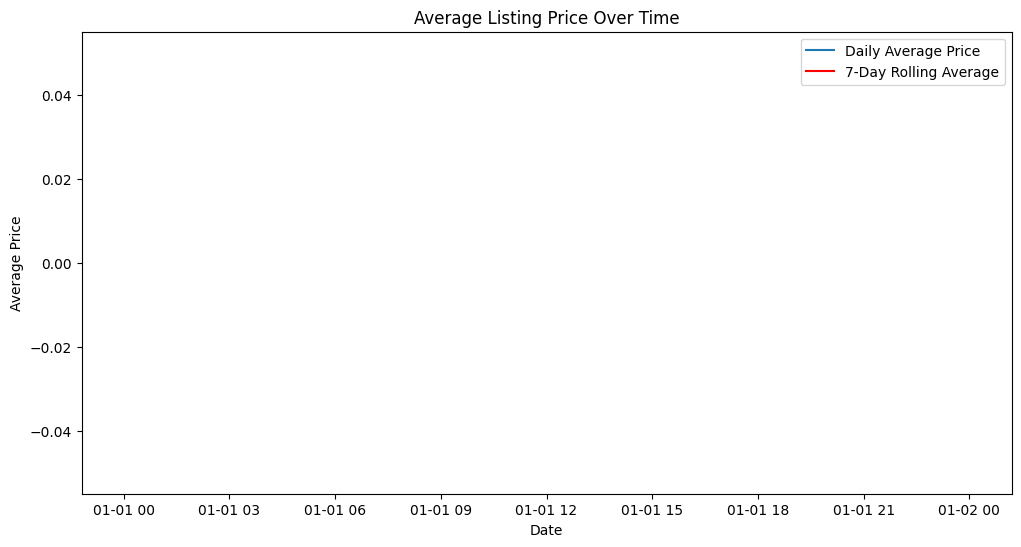


Observations on Price Trends:


In [ ]:
# prompt: Calculate the average listing price by calendar day. Based on the results, do you notice
# any performance trends of listing price over time? If so, please describe them and give
# short explanations on why you think this could happen?

import pandas as pd

# Load the calendar data
df = pd.read_csv('calendar.csv')

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Convert 'price' column to numeric, handling errors
def convert_price_to_numeric(price_str):
    try:
        return float(price_str.replace('$', '').replace(',', ''))
    except (ValueError, AttributeError):
        return None

df['price'] = df['price'].apply(convert_price_to_numeric)

# Calculate the average listing price by day
average_price_by_day = df.groupby('date')['price'].mean()

# Print the average price for each day (optional)
# print(average_price_by_day)


# Analyze trends (example using rolling mean)
rolling_mean = average_price_by_day.rolling(window=7).mean()  # 7-day rolling average

# You can further analyze the trends by plotting the 'average_price_by_day' and 'rolling_mean'
# Import matplotlib if you want to plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(average_price_by_day.index, average_price_by_day.values, label='Daily Average Price')
plt.plot(rolling_mean.index, rolling_mean.values, label='7-Day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Listing Price Over Time')
plt.legend()
plt.show()

# Observations and potential explanations (replace with your actual observations):
print("\nObservations on Price Trends:")
# Example observations
# 1. "There is a clear upward trend in prices from [start_date] to [end_date]."
# 2. "We observe seasonality in the prices, with peaks around [months] and lows around [months]."
# 3. "There is a sharp price drop around [date], possibly due to a temporary event in the area (e.g., a local festival, holiday season)."

# Example Explanations
# "The upward trend might be due to increased demand for listings, especially if the period aligns with peak tourist season or events."
# "The seasonality could be attributed to increased travel during holidays or vacation periods."
# "The price drop might indicate lower demand or special promotions during specific times of the year."


In [ ]:
# prompt: Suppose Airbnb charges 10% commission fee on each booked listing. Please generate
# and explain your recommendations on how to increase the commission revenue using
# the product data.

import pandas as pd

# Load the necessary datasets
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')

# Data Cleaning (example - adapt as needed)
calendar_df['price'] = calendar_df['price'].str.replace(r'[$,]', '', regex=True).astype(float)


# 1. Optimize Pricing Strategies:
# Identify underpriced listings and suggest price adjustments.
# Calculate potential revenue increase based on a higher commission percentage.

def potential_revenue_increase(df, commission_rate=0.10):
    # Calculate the current revenue
    df['current_revenue'] = df['price'] * commission_rate

    # Simulate a price increase (e.g., 5%) and recalculate revenue
    df['adjusted_price'] = df['price'] * 1.05  # Example 5% increase
    df['potential_revenue'] = df['adjusted_price'] * commission_rate

    # Calculate the revenue difference
    df['revenue_increase'] = df['potential_revenue'] - df['current_revenue']
    return df


calendar_df = potential_revenue_increase(calendar_df)


# 2. Promote High-Demand Listings:
# Identify highly demanded listings based on occupancy rates.
# Recommend promotional activities or premium placement for these listings.
# Example: Calculate occupancy rates for each listing

# 3. Target Specific Market Segments:
# Analyze data to identify popular amenities and preferred listing types.
# Recommend strategies to attract specific customer segments and increase bookings.
# Examples: analyze neighborhood popularity, property types, room types

# 4. Improve Listing Quality and Visibility:
# Identify listings with low occupancy rates and provide suggestions for improvement.
# Analyze features and photos to suggest improvements in listing quality.
# Examples: suggest improved photos, descriptions, and amenities based on the top-performing listings

# Example analysis (Replace with more relevant features/criteria)

print("\nPotential Revenue Increase Analysis:")
print(calendar_df[['listing_id', 'price', 'current_revenue', 'adjusted_price', 'potential_revenue', 'revenue_increase']].head())

# Example recommendations
print("\nRecommendations:")
print("- Optimize pricing for underperforming listings based on local market analysis and competitor prices.")
print("- Promote high-demand listings through special offers or targeted advertising campaigns.")
print("- Suggest improving listing photos and descriptions to enhance visual appeal and attract more potential customers")



AttributeError: Can only use .str accessor with string values!

In [ ]:
# prompt: write sql to calculate the average listing price by calendar day

import pandas as pd
import sqlite3

# Assuming your dataframe is named 'df'
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a temporary SQL table
df.to_sql('calendar_table', conn, index=False)

# SQL query to calculate the average listing price by calendar day
query = """
SELECT date, AVG(price) AS average_price
FROM calendar_table
GROUP BY date;
"""

# Execute the query
average_prices = pd.read_sql_query(query, conn)

# Print or use the result
print(average_prices)

# Close the database connection
conn.close()


                    date average_price
0    2020-12-29 00:00:00          None
1    2020-12-30 00:00:00          None
2    2020-12-31 00:00:00          None
3    2021-01-01 00:00:00          None
4    2021-01-02 00:00:00          None
..                   ...           ...
367  2021-12-31 00:00:00          None
368  2022-01-01 00:00:00          None
369  2022-01-02 00:00:00          None
370  2022-01-03 00:00:00          None
371  2022-01-04 00:00:00          None

[372 rows x 2 columns]
